# 2) Convolution

Convolution provides a way of multiplying two arrays to produce a third array. Depending on the designed filter and the intended effect, the kernel can be a matrix of dimensions, for example, 3x3, 5x5 or 7x7.

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Function for reading image

In [2]:
def ICV_read_image(filepath, show_plot = False):
    """
    param filepath : Path to the image file
    param show_plot : Show the read image from the file path specified
    Returns : The image specified by the filepath as an array
    """
    # Read an image using imread and convert it into numpy array
    image=np.asarray(plt.imread(filepath))

    # Display the read image
    if show_plot:
        plt.imshow(image)
    return image

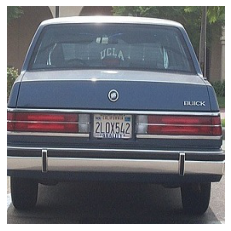

In [3]:
#Trying out the function for reading image
image = ICV_read_image("Dataset/DatasetA/car-1.jpg")
plt.axis("off")
plt.imshow(image)

In [4]:
def ICV_greyscale_convolution(image, kernel, stride, pad, pad_type):
    """
    param image : Image that has to be convoluted
    param kernel : Kernel to be convolution
    param stride : Stride for convolution
    param pad : Length of the padding
    param pad_type : Type of padding - zero padding or padding with edge pixels
    Returns : The image after convolution
    """
    if len(image.shape) == 3:
        image = ICV_RGB_to_greyscale(image)
    image_height, image_width = np.shape(image)
    kernel_height, kernel_width = np.shape(kernel)
    
    #Computing the dimensions of output image 
    conv_image_height = int((image_height - kernel_height + 2 * pad) / stride) + 1
    conv_image_width = int((image_width - kernel_width + 2 * pad) / stride) + 1
    
    #Initializing the output after convolution on an image using zeros
    conv_image = np.zeros((conv_image_height, conv_image_width))
    
    #Calling function to pad the image with the required pad length
    if pad_type == "zeros":
        padded_image = ICV_pad_image_zeros(image, pad)
    elif pad_type == "replicate":
        padded_image = ICV_pad_image_replicate_edge(image, pad)
    else:
        print("Padding type is not valid")
    
    #Looping over the output image
    #Looping over the vertical axis of the output image
    for height in range(conv_image_height):
        
        #Looping over the horizontal axis of the output volume
        for width in range(conv_image_width):
            
            #Calculating the vertical start and end of the current slice of the image : change
            top = height * stride
            bottom = height * stride + kernel_height
            
            #Calculating the horizontal start and the end of the current slice of the image : change
            left = width * stride
            right = width * stride + kernel_width
            
            #Using the dimensions to get a slice of the input image
            sliced_image = padded_image[top : bottom, left : right]
            
            #Calling the covolution method to get convolution on a slice of the input image
            conv_image[height, width] = ICV_convolution_one_step(sliced_image, kernel)
        
    return conv_image

In [5]:
def ICV_RGB_to_greyscale(image):
    """
    param image : RGB image that needs to be converted to greyscale image
    Returns : The greyscale image of the RGB image 
    """
    #Array slicing to get all the channels
    normalized_image = image
    red, green,blue  = normalized_image[:, :, 0], normalized_image[:, :, 1], normalized_image[:, :, 2]
    red_const, green_const, blue_const = 0.3, 0.59, 0.11
    
    greyscale_image = red_const * red + \
                        green_const * green + \
                        blue_const * blue
    return greyscale_image

In [6]:
def ICV_pad_image_zeros(image, pad_length):
    """
    param image : Image that needs to be padded
    pad_length : Amount of padding
    Returns : The padded image with zeros
    """
    #Getting the height and width of input image
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    #Initializing a matrix with zeros with dimensions (height + 2 * pad) * (width + 2 * pad)
    padded_image = np.zeros((image_height + 2 * pad_length, image_width + 2 * pad_length))
    
    #Inserting the image matrix at the requied position
    padded_image[pad_length : image_height + pad_length, pad_length : image_width + pad_length] = image
    
    return padded_image


In [7]:
def ICV_pad_image_replicate_edge(image, pad_length):
    """
    param image : Image that needs to be padded
    pad_length : Amount of padding
    Returns : The padded image with edge pixels
    """
    #Getting the height and width of input image
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    #Initializing a matrix with zeros with dimensions (height + 2 * pad) * (width + 2 * pad)
    padded_image = np.zeros((image_height + 2 * pad_length, image_width + 2 * pad_length))
    
    #Inserting the image matrix at the requied position
    padded_image[pad_length : image_height + pad_length, pad_length : image_width + pad_length] = image
    
    #Replicating the pixels of the edges for padding
    for i in range(pad_length):
        padded_image[i , :] = padded_image[pad_length, :]
        padded_image[image_height + pad_length + i, :] = padded_image[image_height + pad_length -1, :]
        padded_image[:, i] = padded_image[:, pad_length]
        padded_image[:, image_width + pad_length + i] = padded_image[:, image_width + pad_length -1]
           
    return padded_image

In [8]:
def ICV_convolution_one_step(part_of_image, kernel):
    """
    param part_of_image : Part of image with the same size as the kernel
    param kernel : Kernel for convolution
    Returns : The part of the image after convolution
    """
    values = part_of_image * kernel
    convolution_value = np.sum(values)
    return convolution_value

In [9]:
def ICV_design_average_kernel(n):
    """
    n : Size of the kernel
    Returns : Average filter of size n * n
    """
    average_kernel = np.ones((n, n))
    average_kernel = average_kernel * (1/(n*n))
    return average_kernel

In [10]:
def ICV_convolution_average_kernel(image):
    """
    param image : Input image for average intensity convolution
    Returns : The image after convolution with average intensity kernel
    """
    filepath = "Dataset/DatasetA/car-1.jpg"
    average_kernel = ICV_design_average_kernel(3)
    ouput_image_using_average_kernel = ICV_greyscale_convolution(image, average_kernel, 1, 2, "replicate")
    plt.imshow(ouput_image_using_average_kernel, cmap = 'gray')
    plt.title("Image after convolution with average internsity kernel")
    plt.axis("off")
    plt.show()
    return ouput_image_using_average_kernel
    
    

<b>a) Code a function that takes an input image, performs convolution with a given kernel, and returns the resulting image.<b>

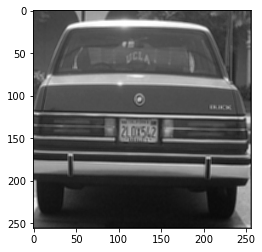

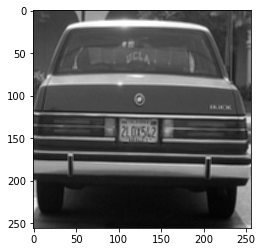

In [11]:
#Trying out convolution with zero padding
output = ICV_greyscale_convolution(image, np.ones((3, 3)), 1, 1, "zeros")
plt.imshow(output, cmap = 'gray')
plt.show()

#Trying out convolution with replicating the border pixesl
output = ICV_greyscale_convolution(image, np.ones((3, 3)), 1, 1, "replicate")
plt.imshow(output, cmap = 'gray')
plt.show()


<b>b) Design a convolution kernel that computes, for each pixel, the average intensity value in a 3x3 region. Use this kernel and the filtering function above, and save the resulting image.</b>

In [12]:
#Calling functin to get the designed average filter
average_kernel = ICV_design_average_kernel(3)
print("Average kernel : \n", average_kernel)


Average kernel : 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


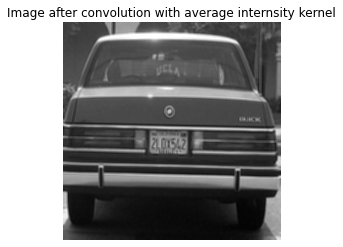

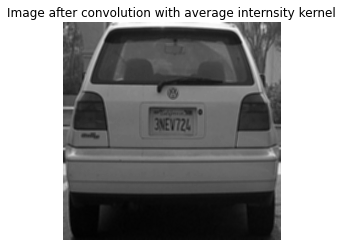

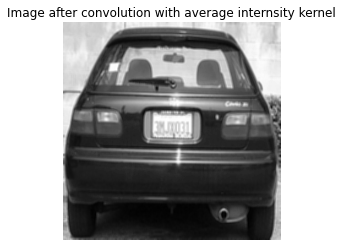

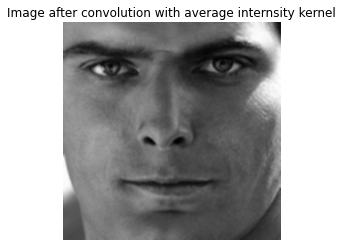

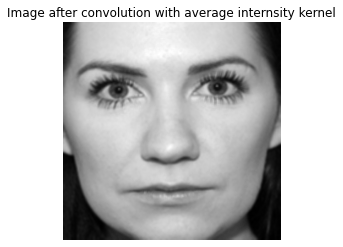

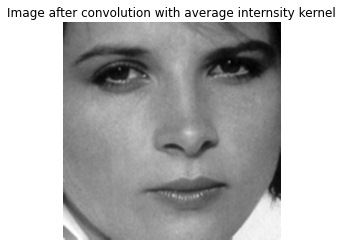

In [13]:
dataset = ["car-1.jpg", "car-2.jpg", "car-3.jpg", "face-1.jpg", "face-2.jpg", "face-3.jpg"]

#Doing convolution with average filter and all images in dataset-A
for filename in dataset:
    filepath = "Dataset/DatasetA/" + filename
    image = ICV_read_image(filepath)
    output = ICV_convolution_average_kernel(image)
    plt.imsave("{} with average filter.jpg".format(filename), output, cmap = 'gray')


<b>c) Use the kernels provided below, apply the filtering function and save the resulting images. Comment on the effect of each kernel.
</b>

In [14]:
kernel_A = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]])

kernel_B = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])


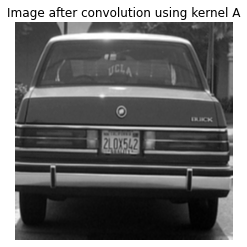

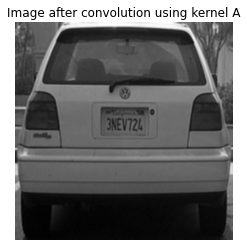

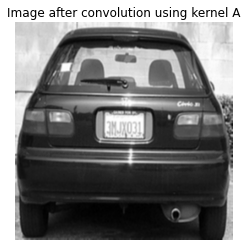

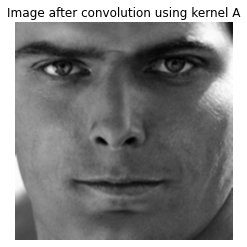

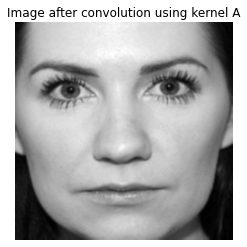

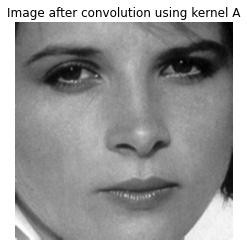

In [15]:
#Doing convolution with kernel A and all images in dataset-A 
for filename in dataset:
    filepath = "Dataset/DatasetA/" + filename
    image = ICV_read_image(filepath)
    output = ICV_greyscale_convolution(image, kernel_A, 1, 2, "replicate")
    plt.imshow(output, cmap = 'gray')
    plt.axis("off")
    plt.title("Image after convolution using kernel A")
    plt.show()
    plt.imsave("{} conv with kernel A.jpg".format(filename), output, cmap = 'gray')


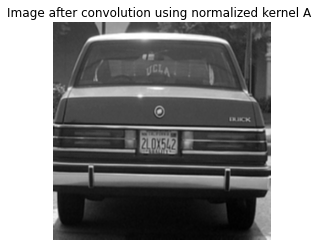

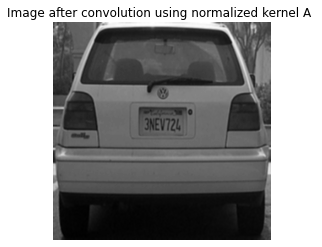

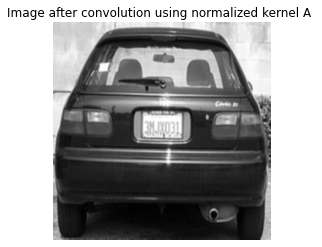

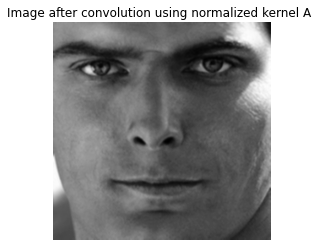

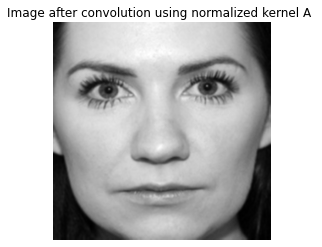

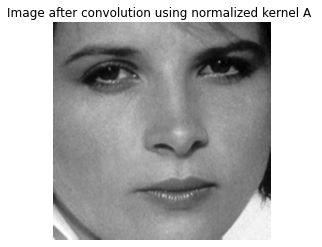

In [16]:
#Doing convolution with kernel A and all images in dataset-A after normalizing the kernel A
for filename in dataset:
    filepath = "Dataset/DatasetA/" + filename
    image = ICV_read_image(filepath)
    output = ICV_greyscale_convolution(image, 1/np.sum(kernel_A) * kernel_A, 1, 2, "replicate")
    plt.imshow(output, cmap = 'gray')
    plt.axis("off")
    plt.title("Image after convolution using normalized kernel A ")
    plt.show()
    plt.imsave("{} conv with kernel A.jpg".format(filename), output, cmap = 'gray')


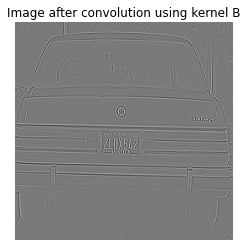

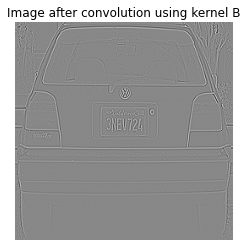

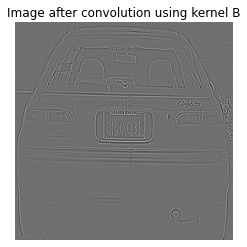

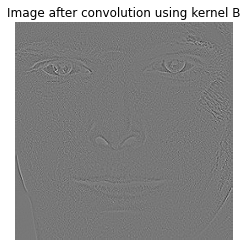

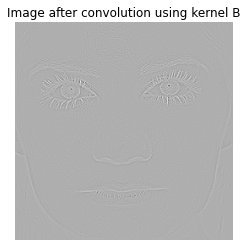

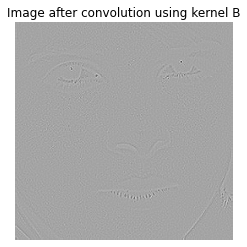

In [17]:
#Doing convolution with kernel B and all images in dataset-A
for filename in dataset:
    filepath = "Dataset/DatasetA/" + filename
    image = ICV_read_image(filepath)
    output = ICV_greyscale_convolution(image, kernel_B, 1, 2, "replicate")
    plt.imshow(output, cmap = 'gray')
    plt.title("Image after convolution using kernel B")
    plt.axis("off")
    plt.show()
    plt.imsave("{} conv with kernel B.jpg".format(filename), output, cmap = 'gray')


<b>d) Use the filtering function for the following filtering operations. Comment the results.
</b>

<b>(i) A followed by A</b>

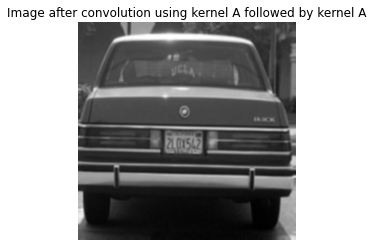

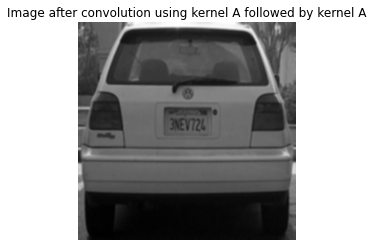

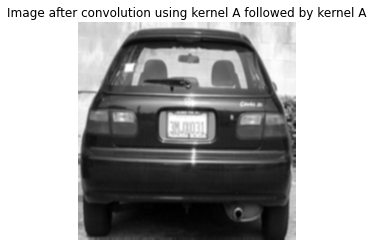

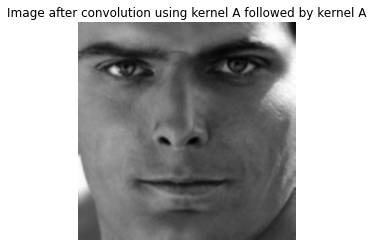

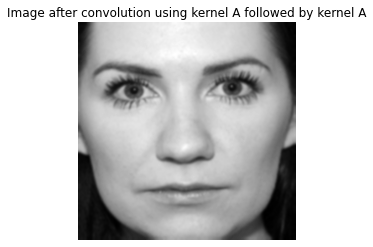

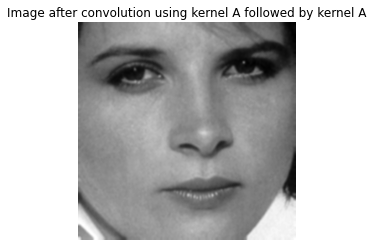

In [18]:
#Doing convolution with kernel A followed by kernel A and all images in dataset-A
for filename in dataset:
    filepath = "Dataset/DatasetA/" + filename
    image = ICV_read_image(filepath)
    
    output_A = ICV_greyscale_convolution(image, kernel_A, 1, 2, "replicate")
    output_AA = ICV_greyscale_convolution(output_A, kernel_A, 1, 2, "replicate")

    plt.imshow(output_AA, cmap = "gray")
    plt.title("Image after convolution using kernel A followed by kernel A")
    plt.axis("off")
    plt.show()
    plt.imsave("{} conv with kernel A followed by kernel A.jpg".format(filename), output, cmap = 'gray')


(ii) A followed by B

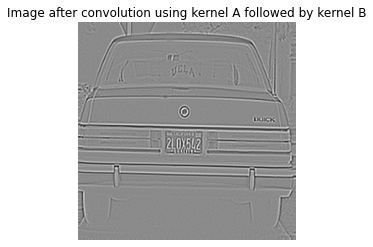

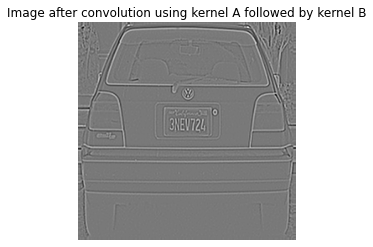

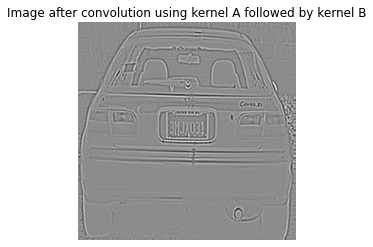

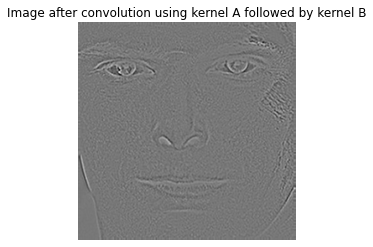

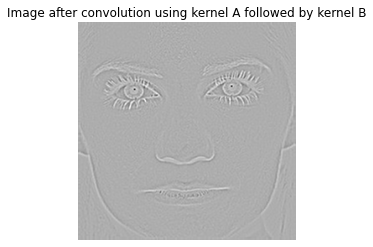

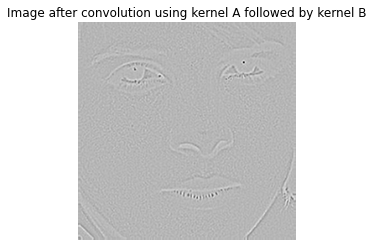

In [19]:
#Doing convolution with kernel A followed by kernel A and all images in dataset-A
for filename in dataset:
    filepath = "Dataset/DatasetA/" + filename
    image = ICV_read_image(filepath)
    
    output_A = ICV_greyscale_convolution(image, 1/np.sum(kernel_A) * kernel_A, 1, 2, "replicate")
    output_AB = ICV_greyscale_convolution(output_A, kernel_B, 1, 2, "replicate")

    plt.imshow(output_AB, cmap = "gray")
    plt.title("Image after convolution using kernel A followed by kernel B")
    plt.axis("off")
    plt.show()
    plt.imsave("{} conv with kernel A followed by kernel B.jpg".format(filename), output, cmap = 'gray')






(iii) B followed by A

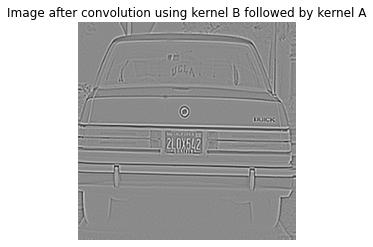

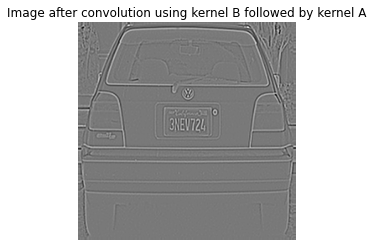

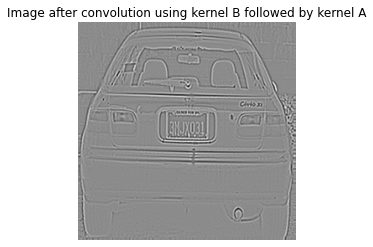

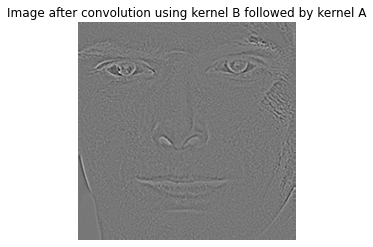

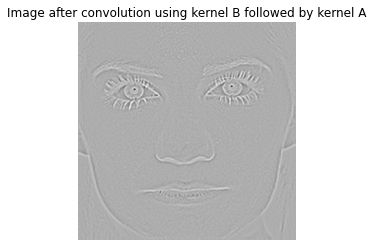

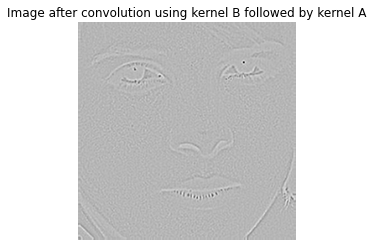

In [20]:
#Doing convolution with kernel A followed by kernel A and all images in dataset-A
for filename in dataset:
    filepath = "Dataset/DatasetA/" + filename
    image = ICV_read_image(filepath)
    output_B = ICV_greyscale_convolution(image, kernel_B, 1, 2, "replicate")
    output_BA = ICV_greyscale_convolution(output_B, 1/np.sum(kernel_A) * kernel_A, 1, 2, "replicate")
    plt.axis("off")
    plt.imshow(output_BA, cmap = "gray")
    plt.title("Image after convolution using kernel B followed by kernel A")
    plt.show()
    plt.imsave("{} conv with kernel B followed by kernel A.jpg".format(filename), output, cmap = 'gray')

